# LFSR Experiments

## Objective

- Understand simple LFSR implementation
- Characterize an LFSR output
- Experiment with truncated and post processing of LFSR output

## A Galois LFSR Implementation

In [2]:
class LFSR:
    """
    Linear Feedback Shift Register (LFSR) implementation.

    Attributes:
        state (int): The current state of the LFSR.
        tap (int): The tap position for feedback.

    Methods:
        step(): Perform one step of the LFSR and update the state.
        run(steps): Run the LFSR for a specified number of steps and return the output sequence.
    """
    def __init__(self, seed, tap):
        """
        Initialize the LFSR with a seed and tap position.

        Args:
            seed (int): The initial seed value for the LFSR.
            tap (int): The tap position for feedback.
        """
        self.state = seed
        self.tap = tap

    def step(self):
        """
        Perform one step of the LFSR and update the state.

        Returns:
            int: The new state of the LFSR after the step.
        """
        lsb = self.state & 1
        self.state >>= 1
        if lsb:
            self.state ^= self.tap
        return self.state

    def run(self, steps):
        """
        Run the LFSR for a specified number of steps and return the output sequence.

        Args:
            steps (int): The number of steps to run the LFSR.

        Returns:
            list: The output sequence of the LFSR.
        """
        return [self.step() for _ in range(steps)]

# Example usage
seed = 0xACE1  # Initial seed
tap = 0xD008  # Tap position for 16-bit LFSR
lfsr = LFSR(seed, tap)
output = lfsr.run(10)  # Generate 10 steps
print(output)

[34424, 17212, 8606, 4303, 55407, 48191, 36375, 38659, 39817, 40396]


## LFSR Period

All LFSRs have a period after which they repeat. The period is based on the LFSR polynomial. Primitivie polynomials (those that can't be factorized) for an $n$ bit LFSR have a period of $2^n - 1$. Hence the maximal period of an LFSR is $2^n - 1$.

In [3]:
# Python code to find the period of a stream of numbers
def find_period(stream):
    for period in range(1, len(stream) // 2):
        if stream[:period] == stream[period:2 * period]:
            return period
    return None

## LFSR Output Analysis

Create a 16-bit LFSR using a primitive polynomial and generate some output. Compute the period. It should be 2^16 - 1 (=65535).

In [4]:
lfsr = LFSR(0xACE1, 0xD008)
output = lfsr.run(4 * 2 ** 16)
period = find_period(output)
print(period)

65535


### Truncated LFSR Output

Take the lower 8-bits of the 16-bit LFSR output. The period should be the same as the 16-bit LFSR.

In [5]:
trunc_output = [output[x] & 0xFF for x in output]
period = find_period(trunc_output)
print(period)

65535


### Post Processed LFSR Output

In this case a folding technique is used to transform the 16-bit LFSR output to an 8-bit output but adding the lower and upper 8-bits of the LFSR output. Its period should also be the same as for the 16-bit LFSR.

In [6]:
folded_output = [((output[x] & 0xFF) + (output[x] >> 8) & 0xFF) for x in output]
period = find_period(folded_output)
print(period)

65535


### Auto Correlation Analysis

Lag plots can be used to see if the LFSR output is auto-correlated, i.e. how closely a previous LFSR value correlates to the next LFSR value. A lag of 1 is used in this analysis.

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



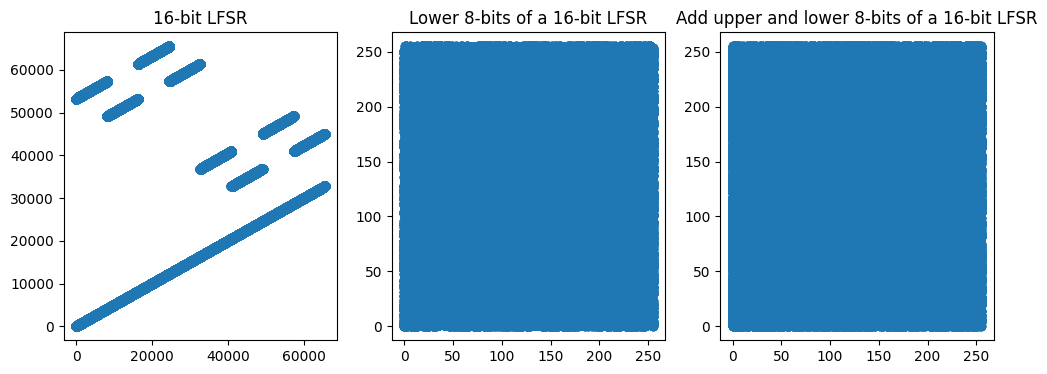

In [8]:

# Create a Lag plot of output
lag = 1

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].scatter(output[:-lag], output[lag:])
axs[0].set_title("16-bit LFSR")
axs[1].scatter(trunc_output[:-lag], trunc_output[lag:])
axs[1].set_title("Lower 8-bits of a 16-bit LFSR")
axs[2].scatter(folded_output[:-lag], folded_output[lag:])
axs[2].set_title("Add upper and lower 8-bits of a 16-bit LFSR")
plt.show()



255


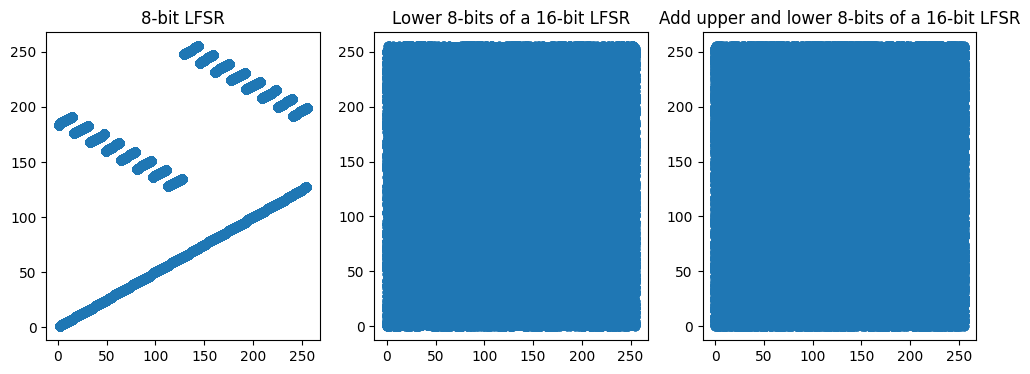

In [9]:
## 8-bit LFSR

# Example usage
seed = 0xAC  # Initial seed
tap = 0xB8  # Tap position for 8-bit LFSR
lfsr8 = LFSR(seed, tap)

output_lfsr8 = lfsr8.run(4 * 2 ** 16)
period = find_period(output_lfsr8)
print(period)

lag = 1
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].scatter(output_lfsr8[:-lag], output_lfsr8[lag:])
axs[0].set_title("8-bit LFSR")
axs[1].scatter(trunc_output[:-lag], trunc_output[lag:])
axs[1].set_title("Lower 8-bits of a 16-bit LFSR")
axs[2].scatter(folded_output[:-lag], folded_output[lag:])
axs[2].set_title("Add upper and lower 8-bits of a 16-bit LFSR")
plt.show()

### 16-bit LFSR with incrementing seed on rollover

(Seed, Tap): ('0xace1', '0xd008')
(Seed, Tap): ('0xace2', '0xd008')
(Seed, Tap): ('0xace3', '0xd008')
(Seed, Tap): ('0xace4', '0xd008')
2621440
(Seed, Tap): ('0x7f3b', '0xd008')
(Seed, Tap): ('0x6c41', '0xd008')
(Seed, Tap): ('0xc7f1', '0xd008')
(Seed, Tap): ('0xdd06', '0xd008')


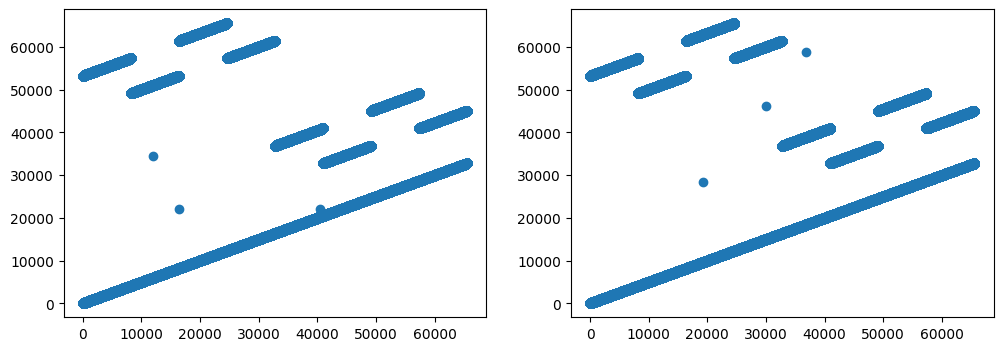

In [29]:
seed = 0xACE1
tap = 0xD008
iterations = 4
output = []


for i in range(iterations):
    print("(Seed, Tap):", (hex(seed), hex(tap)))
    lfsr = LFSR(seed, tap)
    output += lfsr.run(10 * 2 ** 16)
    seed += 1

print(len(output))

lag = 1
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(output[:-lag], output[lag:])

import random
seed = random.randint(0, 0xFFFF)
routput = []

for i in range(iterations):
    print("(Seed, Tap):", (hex(seed), hex(tap)))
    lfsr = LFSR(seed, tap)
    routput += lfsr.run(10 * 2 ** 16)
    seed = random.randint(0, 0xFFFF)

axs[1].scatter(routput[:-lag], routput[lag:])

plt.show()

### Entropy Analysis

In [11]:
import numpy as np
from collections import Counter

def calculate_entropy(data):
    """
    Calculate the Shannon entropy of an array of 8-bit numbers.
    :param data: List or NumPy array of 8-bit numbers (0-255)
    :return: Entropy value in bits
    """
    if len(data) == 0:
        return 0.0  # Avoid log(0) error

    # Count occurrences of each byte value
    counts = Counter(data)
    total = len(data)

    # Compute entropy
    entropy = -sum((count / total) * np.log2(count / total) for count in counts.values())

    return entropy

# Example usage
entropy_value = calculate_entropy(output_lfsr8)
print(f"8 bit LFSR Entropy: {entropy_value:.4f} bits")

entropy_value = calculate_entropy(trunc_output)
print(f"Truncated 16-bit LFSR Entropy: {entropy_value:.4f} bits")

entropy_value = calculate_entropy(folded_output)
print(f"Folded 16-bit LFSR Entropy: {entropy_value:.4f} bits")


8 bit LFSR Entropy: 7.9944 bits
Truncated 16-bit LFSR Entropy: 8.0000 bits
Folded 16-bit LFSR Entropy: 8.0000 bits


##
